# Supervised Learning - Regularization

In this exercise we're going to look at how to lower the chance of overfitting by using regularization parameters. 

## Lasso & Ridge Regression

In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk

%matplotlib inline
plt.style.use("ggplot")

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error


In [0]:
# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

In [0]:
n_alphas = 200
alphas = np.logspace(-10, -1, n_alphas)

In [0]:
def determine_coefficients(alphas, model, X, y):
    """Determine the coefficients of a linear model given the various alphas. 
    You should train a model for each value of alpha and then score it using mean_sqaure error
    
    Args:
        alphas (iterable): The alphas to test out with the model
        model (sklearn.estimator Class): A type of linear model not instantiated
        X (iterable): The data to train on
        y (iterable): The labels to train on
        
    Returns:
        coefs (iterable): the coefficients extracted from the trained model. See model.coef_
    """
    # YOUR CODE HERE
    # raise NotImplementedError()
    
   
    coefs = []
    
    for i in alphas:
      # Train a model for each value of alpha
      mod = model(alpha = i, fit_intercept = False)
      mod.fit(X,y)
      coefs.append(mod.coef_)
 
    return coefs
  


In [0]:
coefs = determine_coefficients(alphas, Ridge, X, y)


In [0]:
assert coefs
assert coefs[0].shape == (10,)
assert len(coefs) == len(alphas)


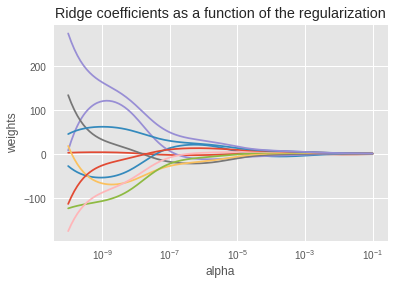

In [210]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [0]:
# Set the coefficients of lasso with the same data and alphas as ridge to lassoCoefs
# YOUR CODE HERE
# raise NotImplementedError()


lassoCoefs = determine_coefficients(alphas, Lasso, X, y)

In [0]:
assert lassoCoefs
assert lassoCoefs[0].shape == (10,)
assert len(lassoCoefs) == len(alphas)
assert not np.all([lassoCoefs,coefs])

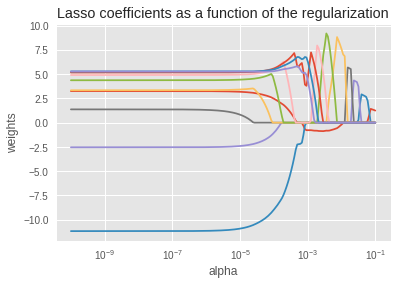

In [213]:
ax = plt.gca()

ax.plot(alphas, lassoCoefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Note that with lasso, the coefficients are significantly smaller.

## Elastic Net

> Based on http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html

In [0]:
from itertools import cycle
from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

eps = 5e-3

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [0]:
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

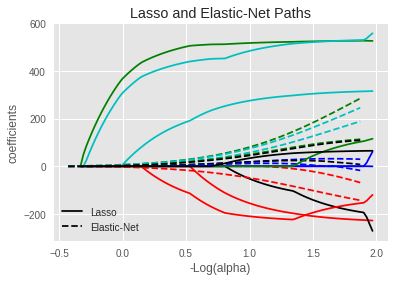

In [216]:
ax = plt.gca()

colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')
plt.show()

Note that with elastic net, the coefficients go above zero with a larger value of alpha. Change the `l1_ratio` above and see how that affects the graph.

The higher the `l1_ratio` the faster the coefficients should go above zero.

## Feedback

In [0]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    # YOUR CODE HERE
    raise NotImplementedError()